In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("D:\Downloads\Spam_Ham.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\DELL\AppData\Local\Temp\ipykernel_13060\1566331806.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Downloads\Spam_Ham.csv")


In [3]:
df.head()

,class,message
0,ham,"jurong point, crazy.. Available only in bugis ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape


(5574, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5574 non-null   object
 1   message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='class', ylabel='Count'>

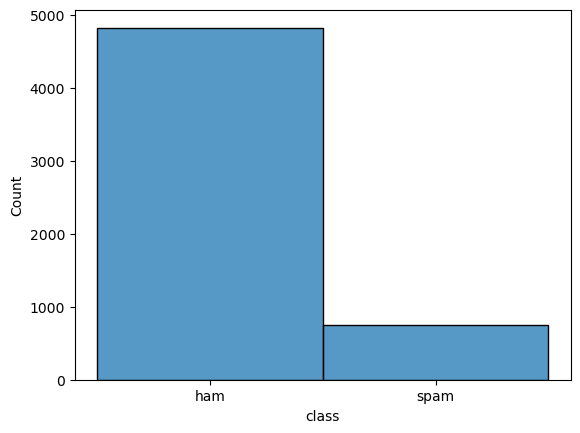

In [11]:

sns.histplot(df["class"] )

<Axes: xlabel='class'>

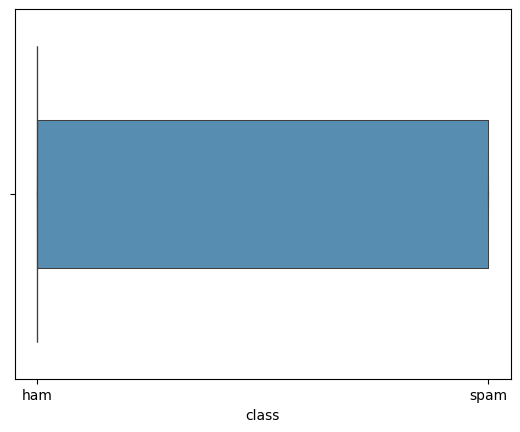

In [16]:
sns.boxenplot(x= df["class"])

In [26]:
# Add message length column to the dataframe
df['message_lengths'] = df['message'].apply(len)

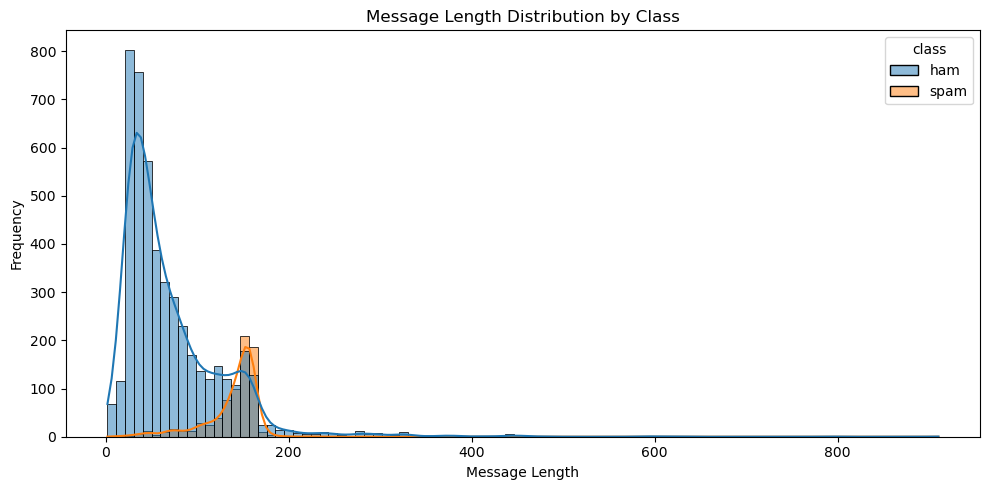

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='message_lengths', hue='class', kde=True, )
plt.title('Message Length Distribution by Class')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['class'])

In [40]:
df.head()

,class,message,message_lengths,label
0,ham,"jurong point, crazy.. Available only in bugis ...",102,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [48]:

x , y = df['message'], df['label']

In [49]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

means that some entries in your X_train or X_test contain non-string values (like integers), but CountVectorizer expects pure text (strings).

In [51]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)

vectorizer = CountVectorizer(stop_words='english', max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [47]:
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
y_pred = lr.predict(X_test_vec)

In [57]:

print(f"Accuracy:{ accuracy_score(y_test, y_pred)}")
    

Accuracy:0.8834080717488789


In [72]:
cm =confusion_matrix(y_test, y_pred)


In [ ]:
print(f"confusion_matrix: \n{cm}")


confusion_matrix: 
[[927  31]
 [ 99  58]]


<Axes: >

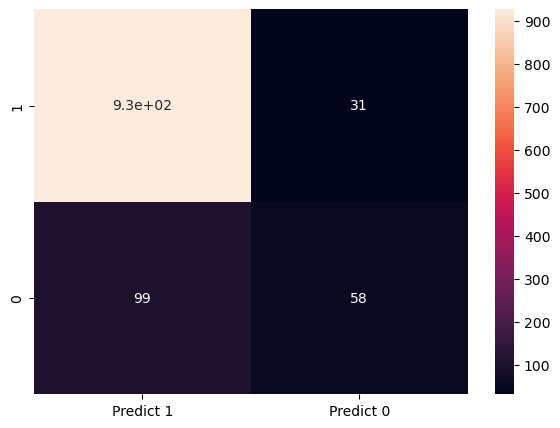

In [74]:
d_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(d_cm, annot=True)

# Multinomial Naive Bayes

In [76]:
nb = MultinomialNB()

In [78]:
nb.fit(X_train_vec, y_train)
y_pred = nb.predict(X_test_vec)

In [92]:
ncm = confusion_matrix(y_test, y_pred)

In [93]:
print(f"confusion_matrix: \n{ncm}")

confusion_matrix: 
[[958   0]
 [ 94  63]]


<Axes: >

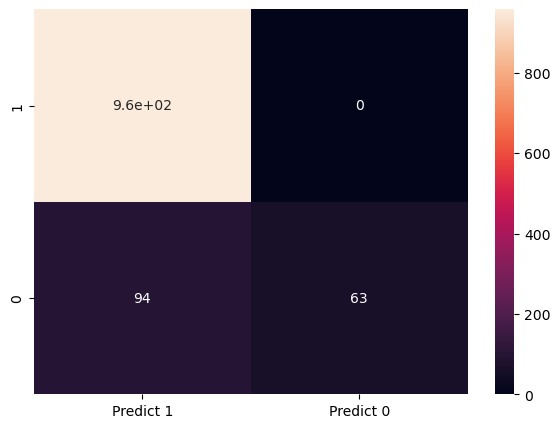

In [94]:
n_cm = pd.DataFrame(ncm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(n_cm, annot=True)

# K-Nearest Neighbor(KNN) 

In [77]:
kn =KNeighborsClassifier(n_neighbors=5)

In [79]:
kn.fit(X_train_vec, y_train)
y_pred = kn.predict(X_test_vec)

In [89]:
kcm = confusion_matrix(y_test, y_pred)

In [90]:
print(f"confusion_matrix: \n{kcm}")

confusion_matrix: 
[[958   0]
 [ 94  63]]


<Axes: >

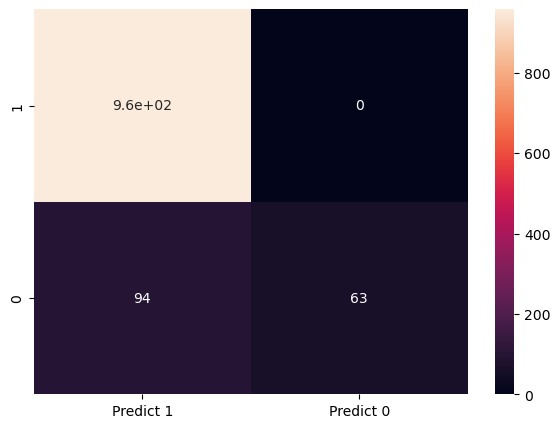

In [91]:

k_cm = pd.DataFrame(kcm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(k_cm, annot=True)